In [23]:
import pandas as pd
import json
import requests
from pprint import pprint
import re

In [2]:
url = "https://public.opendatasoft.com/api/records/1.0/search/?dataset=global-shark-attack&q=&rows=1000&facet=date&facet=type&facet=country&facet=area&facet=activity&facet=sex&facet=age&facet=fatal_y_n&facet=time&facet=species"

response = requests.get(url)    # Will get a HTTP Status code (response object)

response_json = response.json()

In [3]:
# Just want to pull records 
records = response_json['records']

# Look at first record
pprint(len(records))

1000


In [4]:
# Need to make a list of the field dictionaries
records_fields = [x["fields"] for x in records]

# Check list to make sure correct info was collected
records_fields[0:1]

[{'activity': 'Surfing',
  'location': 'Centerville Beach',
  'sex': 'M',
  'year': '2022',
  'injury': 'Thigh injured',
  'case_number': '2022.010.02',
  'time': '15h30',
  'name': 'Jared Trainor',
  'investigator_or_source': 'Outsider, 10/3/2022',
  'age': '31',
  'species': "White shark, 13'",
  'date': '2022-10-02',
  'type': 'Unprovoked',
  'area': 'California',
  'country': 'USA',
  'fatal_y_n': 'N'}]

In [5]:
# Make a dataframe
df = pd.DataFrame(records_fields)
df.head(5)

,activity,location,sex,year,injury,case_number,time,name,investigator_or_source,age,...,type,area,country,fatal_y_n,href_formula,original_order,case_number1,href,pdf,case_number0
0,Surfing,Centerville Beach,M,2022,Thigh injured,2022.010.02,15h30,Jared Trainor,"Outsider, 10/3/2022",31,...,Unprovoked,California,USA,N,NaN,NaN,NaN,NaN,NaN,NaN
1,Surfing,"Topsail Beach, Pender County",F,2022,Lacerations to lower leg,2022.07.19.a,Early morning,Erika Vreuls,C. Creswell. GSAF,NaN,...,Unprovoked,Noirth Carolina,USA,N,http://sharkattackfile.net/spreadsheets/pdf_di...,6787,2022.07.19.a,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.07.19.a-Vreuis.pdf,2022.07.19.a
2,Swimming,"Sawyer Key , Monroe County",F,2022,Laceration to leg,2022.06.29.b,20h00,Lindsay Rebecca Bruns,Miami Herald/ 7/12022,35.0,...,Unprovoked,Florida,USA,N,http://sharkattackfile.net/spreadsheets/pdf_di...,6772,2022.06.29.b,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.06.29.b-Bruns.pdf,2022.06.29.b
3,Swimming,Oyster Stacks near Exmouth12h15,F,2022,Minor injury,2022.06.01,12h15,NaN,"Perth Now, 6//2/2022",NaN,...,Unprovoked,Western Australia,AUSTRALIA,N,http://sharkattackfile.net/spreadsheets/pdf_di...,6765,2022.06.01,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.06.01-Exmouth.pdf,2022.06.01
4,Swimming,Pororari River,F,2021,Laceration to big toe,2021.12.25,NaN,Cordelia Scott,"New Zealand Herald, 12/31/2021",9.0,...,Unprovoked,South Island,New Zealand,N,http://sharkattackfile.net/spreadsheets/pdf_di...,6726,2021.12.25,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.12.25-Scott.pdf,2021.12.25


In [41]:
# Make a cut pd with the fields: ["activity", "location", "sex", "year", "injury", "case_number", "time", "age", "type", "area", "country", "fatal_y_n", "species"]
df_cut = df.loc[:, ["activity", "location", "sex", "year", "injury", "case_number", "time", "age", "type", "area", "country", "fatal_y_n", "species"]]
df_cut.head(5)

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
0,Surfing,Centerville Beach,M,2022,Thigh injured,2022.010.02,15h30,31,Unprovoked,California,USA,N,"White shark, 13'"
1,Surfing,"Topsail Beach, Pender County",F,2022,Lacerations to lower leg,2022.07.19.a,Early morning,NaN,Unprovoked,Noirth Carolina,USA,N,NaN
2,Swimming,"Sawyer Key , Monroe County",F,2022,Laceration to leg,2022.06.29.b,20h00,35.0,Unprovoked,Florida,USA,N,NaN
3,Swimming,Oyster Stacks near Exmouth12h15,F,2022,Minor injury,2022.06.01,12h15,NaN,Unprovoked,Western Australia,AUSTRALIA,N,NaN
4,Swimming,Pororari River,F,2021,Laceration to big toe,2021.12.25,NaN,9.0,Unprovoked,South Island,New Zealand,N,NaN


# Pie Chart looking at shark attacks by sex

<AxesSubplot:title={'center':"Sex of 'Victims'"}>

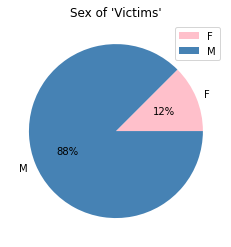

In [62]:
df_sex = df_cut.groupby(["sex"])["sex"].count()
colors = ["pink", "steelblue"]
df_sex.plot(kind="pie", ylabel="", autopct='%1.0f%%', colors=colors, legend=True, title = "Sex of 'Victims'")



In [46]:
df_cut["species"].fillna("unknown", inplace=True)
df_cut

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
0,Surfing,Centerville Beach,M,2022,Thigh injured,2022.010.02,15h30,31,Unprovoked,California,USA,N,"White shark, 13'"
1,Surfing,"Topsail Beach, Pender County",F,2022,Lacerations to lower leg,2022.07.19.a,Early morning,NaN,Unprovoked,Noirth Carolina,USA,N,unknown
2,Swimming,"Sawyer Key , Monroe County",F,2022,Laceration to leg,2022.06.29.b,20h00,35.0,Unprovoked,Florida,USA,N,unknown
3,Swimming,Oyster Stacks near Exmouth12h15,F,2022,Minor injury,2022.06.01,12h15,NaN,Unprovoked,Western Australia,AUSTRALIA,N,unknown
4,Swimming,Pororari River,F,2021,Laceration to big toe,2021.12.25,NaN,9.0,Unprovoked,South Island,New Zealand,N,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Fell into the water,Nerang River near Chevron Island,F,2014,Lacerations to legs,2014.05.27.R,NaN,29,Unprovoked,Queensland,AUSTRALIA,N,"Bull shark, 1.2m"
996,Scuba diving,Wallis Island,M,2014,Lacerations to left thigh and hip,2014.05.23,Morning,NaN,Unprovoked,Wallis and Futuna,FRANCE,N,3m shark
997,Surfing,"Santa Lucea Beach, South Hutchinson Island, St...",M,2014,Lacerations to toes,2014.03.02,NaN,21,Unprovoked,Florida,USA,N,Blacktip or spinner shark?
998,Surfing,"Gleneden Beach, Lincoln County",M,2013,"No injury, board bitten",2013.11.22,10h30,25,Unprovoked,Oregon,USA,N,"White shark, 10 '"


In [63]:
df_cut["species"].unique()

array(["White shark, 13'", nan, '5.5 ft shark', 'White shark',
       'Nurse shark, juvenile', 'Blacktip or Spinner shark',
       'Shovelnose shark which is a ray, not a shark)',
       'Bull shark, 3.5 m', 'Wobbegong shark', 'Tiger shark',
       'White shark, 4.6 m', 'Cookiecutter shark',
       "Bronze whaler shark, 6'", "4' to 5' shark", "6' shark",
       "4' shark", 'Mako shark', 'Tiger shark, 8 to 12 feet', '2 m shark',
       "Bull shark, 4.5'", 'Sandtiger shark', "6' to 8' shark",
       '2m shark', "White shark, >6'", '3 m shark',
       "White shark, 5' to 6' juvenile", "5' to 8' shark",
       "2' to 3' shark", 'Raggedtooth shark',
       'Thought to involve a cookiecutter shark', 'Dusky shark, 2m',
       "5' shark", "3' to 4' shark", "Tiger shark, 14'", 'Nurse shark',
       "1.8 m [6'] bull shark", '2.5 m shark',
       "4 m to 5 m [13' to 16.5'] white shark", 'Questionable Incident',
       'Shark involvement prior to death was not confirmed',
       "3.7 m to 4.3 m [1

In [ ]:
# Clean up data by finding key words and replacing the species information 
# For example, any species that has bull in it will just be replaced with "bull shark"
# any species that has "Great" and "white" will be replaced with "Great white"
# Any species with "Tiger" will be replaced with "Tiger"
# Hammerhead, Mako, Spinner, Nurse, Cookiecutter, Blacktip, Raggedtooth, Zambesi, Grey reef shark, dogfish, wobbegong
# If "or" than species will be replaced with "unknown"
#  

In [63]:
# Function to search for great white buzz words and replace them with "great white" also included C. obscurus (dusky)
def whiteshark(species):
    p = '[Ww]hite'
    if re.search('[Ww]hitetip', species):   # Need to watch out for whitetip species (not great whites)
        return "whitetip"
    elif re.search(p, species):     # great white sharks are just called "white sharks" in much of the world
        return "great white"
    elif re.search('C. obscurus', species):     # Replace species name with common name: dusky
        return 'dusky'
    elif re.search('?', species) or re.search('\sor\s', species):   # If there is a question mark or an "or" than replace with "unknown"
        return 'unknown'
    return species  # else just return the species listed for further inspection later


In [48]:
df_cut["species"] = df_cut["species"].apply(whiteshark)
df_cut

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
0,Surfing,Centerville Beach,M,2022,Thigh injured,2022.010.02,15h30,31,Unprovoked,California,USA,N,great white
1,Surfing,"Topsail Beach, Pender County",F,2022,Lacerations to lower leg,2022.07.19.a,Early morning,NaN,Unprovoked,Noirth Carolina,USA,N,unknown
2,Swimming,"Sawyer Key , Monroe County",F,2022,Laceration to leg,2022.06.29.b,20h00,35.0,Unprovoked,Florida,USA,N,unknown
3,Swimming,Oyster Stacks near Exmouth12h15,F,2022,Minor injury,2022.06.01,12h15,NaN,Unprovoked,Western Australia,AUSTRALIA,N,unknown
4,Swimming,Pororari River,F,2021,Laceration to big toe,2021.12.25,NaN,9.0,Unprovoked,South Island,New Zealand,N,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Fell into the water,Nerang River near Chevron Island,F,2014,Lacerations to legs,2014.05.27.R,NaN,29,Unprovoked,Queensland,AUSTRALIA,N,"Bull shark, 1.2m"
996,Scuba diving,Wallis Island,M,2014,Lacerations to left thigh and hip,2014.05.23,Morning,NaN,Unprovoked,Wallis and Futuna,FRANCE,N,3m shark
997,Surfing,"Santa Lucea Beach, South Hutchinson Island, St...",M,2014,Lacerations to toes,2014.03.02,NaN,21,Unprovoked,Florida,USA,N,Blacktip or spinner shark?
998,Surfing,"Gleneden Beach, Lincoln County",M,2013,"No injury, board bitten",2013.11.22,10h30,25,Unprovoked,Oregon,USA,N,great white


In [53]:
# The sharks list was created by combing through the species.unique() 
sharks = ['hammerhead', 'mako' 'spinner', 'nurse', 'cookiecutter', 'blacktip', 'raggedtooth', 'zambesi', 'reef', 'dogfish', 'wobbegong', "tiger", "bull", "bronze whaler", "sand", "lemon", "blue", "Port Jackson", "thresher", "shovelnose", "porbeagle", "dusky", "banjo", "silvertip"]

# Function created to check if a species is from the approved list; if it is not, then it is replaced with 'unknown'
def clean_shark_species(species):
    for p in sharks:
        if re.search(p, species) or re.search(p.capitalize(), species):
            return p.lower()
    return "unknown"

In [54]:
# Apply filtering function to the species column 
df_cut["species"] = df_cut["species"].apply(clean_shark_species)
df_cut

,activity,location,sex,year,injury,case_number,time,age,type,area,country,fatal_y_n,species
0,Surfing,Centerville Beach,M,2022,Thigh injured,2022.010.02,15h30,31,Unprovoked,California,USA,N,unknown
1,Surfing,"Topsail Beach, Pender County",F,2022,Lacerations to lower leg,2022.07.19.a,Early morning,NaN,Unprovoked,Noirth Carolina,USA,N,unknown
2,Swimming,"Sawyer Key , Monroe County",F,2022,Laceration to leg,2022.06.29.b,20h00,35.0,Unprovoked,Florida,USA,N,unknown
3,Swimming,Oyster Stacks near Exmouth12h15,F,2022,Minor injury,2022.06.01,12h15,NaN,Unprovoked,Western Australia,AUSTRALIA,N,unknown
4,Swimming,Pororari River,F,2021,Laceration to big toe,2021.12.25,NaN,9.0,Unprovoked,South Island,New Zealand,N,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Fell into the water,Nerang River near Chevron Island,F,2014,Lacerations to legs,2014.05.27.R,NaN,29,Unprovoked,Queensland,AUSTRALIA,N,bull
996,Scuba diving,Wallis Island,M,2014,Lacerations to left thigh and hip,2014.05.23,Morning,NaN,Unprovoked,Wallis and Futuna,FRANCE,N,unknown
997,Surfing,"Santa Lucea Beach, South Hutchinson Island, St...",M,2014,Lacerations to toes,2014.03.02,NaN,21,Unprovoked,Florida,USA,N,blacktip
998,Surfing,"Gleneden Beach, Lincoln County",M,2013,"No injury, board bitten",2013.11.22,10h30,25,Unprovoked,Oregon,USA,N,unknown


In [55]:
# Check what unique values are now present 
df_cut['species'].unique()

array(['unknown', 'nurse', 'blacktip', 'shovelnose', 'bull', 'wobbegong',
       'tiger', 'cookiecutter', 'bronze whaler', 'raggedtooth', 'dusky',
       'zambesi', 'hammerhead', 'reef', 'sand', 'lemon', 'blue',
       'thresher', 'silvertip', 'porbeagle', 'banjo', 'dogfish'],
      dtype=object)